In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

100%|██████████| 4.38M/4.38M [00:03<00:00, 1.22MB/s]

Extracting files...


Path to dataset files: C:\Users\visha\.cache\kagglehub\datasets\datatattle\covid-19-nlp-text-classification\versions\1


In [249]:
import pandas as pd
df = pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')
df=df.sample(5000).reset_index(drop=True)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       5000 non-null   int64 
 1   ScreenName     5000 non-null   int64 
 2   Location       3984 non-null   object
 3   TweetAt        5000 non-null   object
 4   OriginalTweet  5000 non-null   object
 5   Sentiment      5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [261]:
df['OriginalTweet'][7]


"Our partners at Healthwise have put together a comprehensive consumer resource center on #COVID19 topics. It's available for free to anyone and provides some great information. #Healthwise https://t.co/bbzWYVbCVm"

In [259]:
df['OriginalTweet'][5]

'Supermarket cashiers get R102m pay bonus for Covid-19 work https://t.co/63DBXYvgaL'

In [263]:
df.shape

(5000, 6)

In [265]:
df.Sentiment.value_counts(normalize=True)

Sentiment
Positive              0.2746
Negative              0.2374
Neutral               0.1912
Extremely Positive    0.1674
Extremely Negative    0.1294
Name: proportion, dtype: float64

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Text Classification
'''
Confusion matrix

precsion / recall / f1-score

auc-roc scores

accuracy

train data or test data

i have build a model having f1-score 0.7 .

'''

Text(0.5, 1.0, 'Sentiment Distribution')

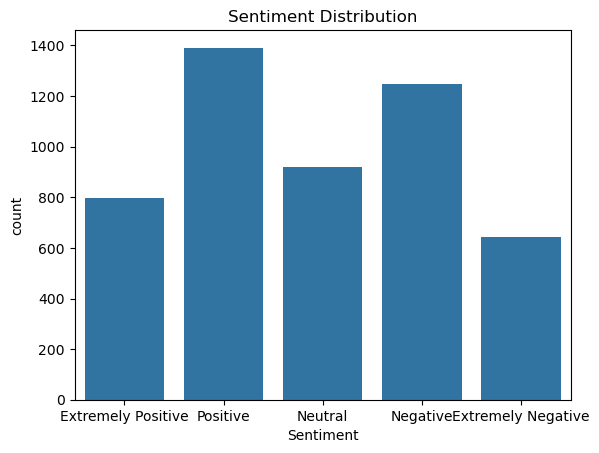

In [152]:


sns.countplot( data=df, x='Sentiment', order = ['Extremely Positive', 'Positive', 'Neutral', 'Negative', 'Extremely Negative'])
plt.title("Sentiment Distribution")

In [168]:
df=df.reset_index(drop=True)

In [267]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
import re 

stem=PorterStemmer()
corpus = []



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [269]:
corpus1 = []
text = df.OriginalTweet
for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()


    corpus1.append(r)


In [271]:
corpus = []
text = df.OriginalTweet
for i in range(len(corpus1)):
    r = corpus1[i].split(" ")
    r = [word for word in r if word not in stopwords.words('english')]
    r = [stem.stem(word) for word in r]
    r = " ".join(r)
    corpus.append(r)


In [273]:
df['text'] = corpus

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text
0,31519,76471,Europe,03-04-2020,#coronavirus #bbcnews WE Need To CLAP for our...,Extremely Negative,coronaviru bbcnew need clap supermarket staff ...
1,40505,85457,NaN,09-04-2020,You know the #toiletpaper shortage is bad when...,Positive,know toiletpap shortag bad got friend live sid...
2,4651,49603,United Kingdom,17-03-2020,". @retailgazette ""Morrisons launches a Âhard...",Negative,retailgazett morrison launch hardship fund sta...
3,40916,85868,National Capital Region,10-04-2020,GRAPHIC-How COVID-19 affected U.S. consumer pr...,Negative,graphic covid affect u consum price march http...
4,4407,49359,"Boston, MA",16-03-2020,We are headed for an extinction-level event fo...,Positive,head extinct level event consum brand oper dig...


In [275]:

X = df['text']

y = df['Sentiment']

In [279]:
y

0       Extremely Negative
1                 Positive
2                 Negative
3                 Negative
4                 Positive
               ...        
4995    Extremely Negative
4996    Extremely Negative
4997    Extremely Positive
4998               Neutral
4999              Negative
Name: Sentiment, Length: 5000, dtype: object

In [281]:
from sklearn.preprocessing import LabelEncoder

# Example target column

# Initialize and apply label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# View encoded labels
print(y_encoded)  # Output: [0, 1, 0, 2]



[0 4 2 ... 1 3 2]


In [301]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123,stratify=y)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (3750,)
Testing Data :  (1250,)


In [303]:
y_train.value_counts(normalize=True)


Sentiment
Positive              0.274667
Negative              0.237333
Neutral               0.191200
Extremely Positive    0.167467
Extremely Negative    0.129333
Name: proportion, dtype: float64

In [305]:
y_test.value_counts(normalize=True)


Sentiment
Positive              0.2744
Negative              0.2376
Neutral               0.1912
Extremely Positive    0.1672
Extremely Negative    0.1296
Name: proportion, dtype: float64

In [205]:
X_train

314     sit idli someon scream groceri store walmart e...
988     break import news flash hand sanit like vaccin...
1294    custom mean inconsider dozen time day upset in...
242     never thought pac man play day would help yet ...
2954    arrest koboko northern uganda hike price salt ...
                              ...                        
1593    shock video london amp area uk show supermarke...
4060    nir eynon hi nir releas local econom stimulu p...
1346    new mexico food bank report troubl keep shelv ...
3454    ask ok said continu preced lay flat ground ran...
3582    thousand wisconsin vote crowd poll place pande...
Name: text, Length: 3350, dtype: object

In [307]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(3750, 12647)

In [223]:
X_train_cv[0,:10]

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [309]:
from sklearn.naive_bayes import MultinomialNB
lr = MultinomialNB()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_test_cv = cv.transform(X_test)


In [311]:
predictions = lr.predict(X_test_cv)

predictions

array(['Positive', 'Extremely Positive', 'Positive', ..., 'Neutral',
       'Positive', 'Positive'], dtype='<U18')

In [313]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, output_dict=True)

# Convert the dictionary into a DataFrame
report_df = pd.DataFrame(report).transpose()


In [315]:
report_df

,precision,recall,f1-score,support
Extremely Negative,0.531915,0.154321,0.239234,162.00
Extremely Positive,0.560748,0.287081,0.379747,209.00
Negative,0.340659,0.417508,0.375189,297.00
Neutral,0.666667,0.234310,0.346749,239.00
Positive,0.324074,0.612245,0.423814,343.00
accuracy,0.380000,0.380000,0.380000,0.38
macro avg,0.484813,0.341093,0.352947,1250.00
weighted avg,0.460026,0.380000,0.366236,1250.00
